In [1]:
#import libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('Customer-Churn-Prediction.csv') #import data set 

In [3]:
df2 = df.copy()

In [4]:
df3 = df.copy()

In [5]:
df1 = df.copy() 

In [6]:
df.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.shape

(7043, 21)

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [10]:
1869/(5174+1869)

0.2653698707936959

C:\Users\Study Mart\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

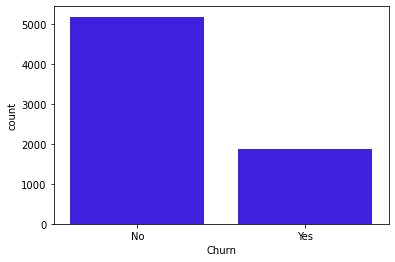

In [11]:
sns.countplot(df['Churn'],color='#2B00FF')

In [12]:
df = df.dropna()

In [13]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(7043, 21)

In [15]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.01609,0.219856
tenure,0.016090,1.00000,0.247890
MonthlyCharges,0.219856,0.24789,1.000000


<AxesSubplot:>

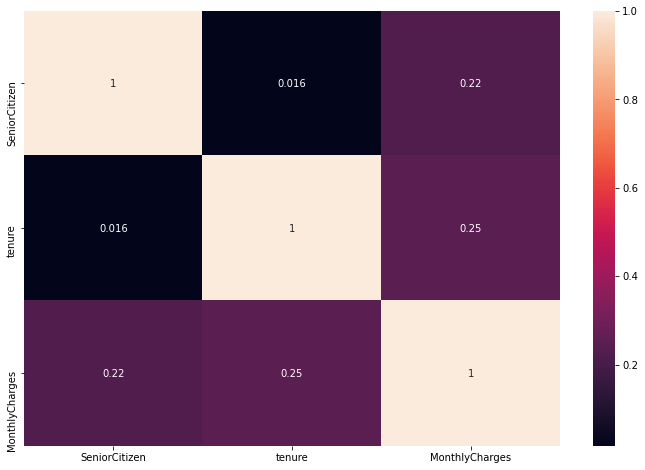

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr() , annot=True)

# Basic Visualization using Seaborn Library

<AxesSubplot:xlabel='count', ylabel='gender'>

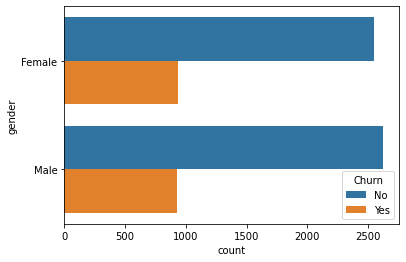

In [17]:
sns.countplot( y = 'gender', hue='Churn', data=df )

<AxesSubplot:xlabel='gender', ylabel='count'>

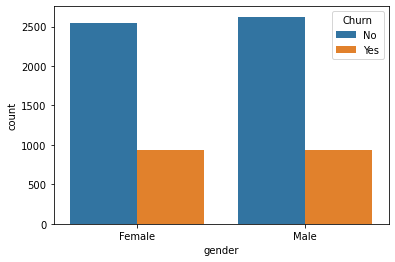

In [18]:
sns.countplot(x = 'gender', hue='Churn', data=df)

<AxesSubplot:xlabel='InternetService', ylabel='count'>

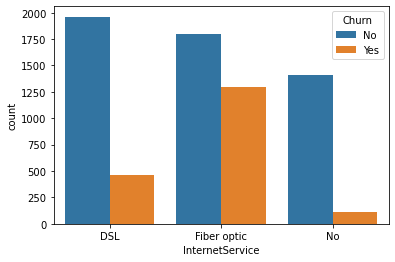

In [19]:
sns.countplot(x = 'InternetService', hue='Churn', data=df)

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

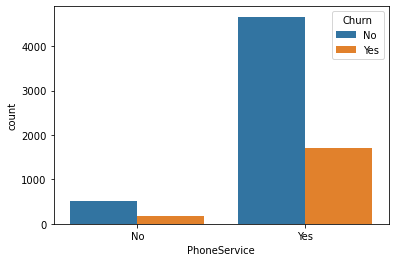

In [20]:
sns.countplot(x = 'PhoneService', hue='Churn', data=df)

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

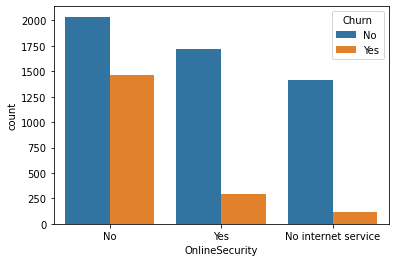

In [21]:
sns.countplot(x = 'OnlineSecurity',hue='Churn', data=df)

In [22]:
df['OnlineSecurity'].value_counts() 

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

<AxesSubplot:xlabel='count', ylabel='PaymentMethod'>

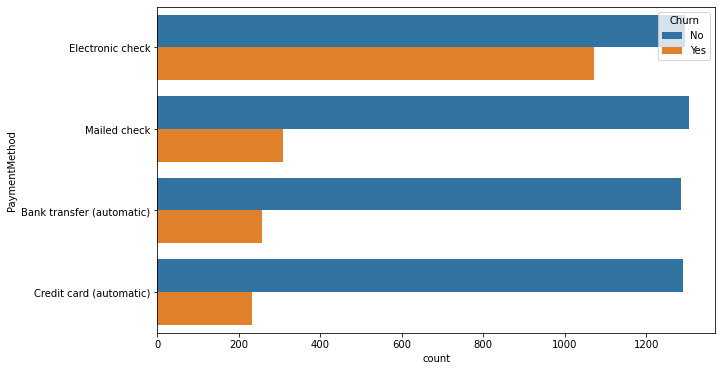

In [23]:
plt.subplots(figsize=(10,6)) 
sns.countplot(y = 'PaymentMethod', hue='Churn', data=df) 

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

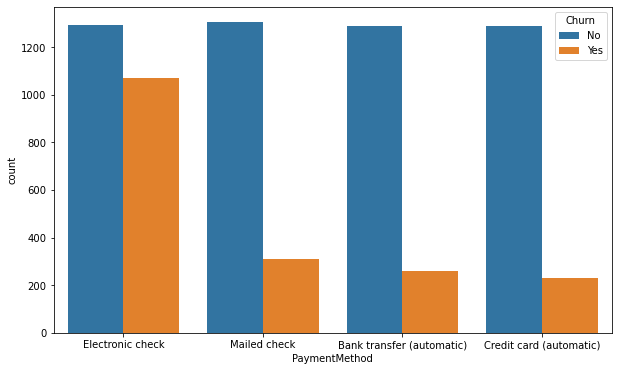

In [24]:
plt.subplots(figsize=(10,6)) 
sns.countplot(x = 'PaymentMethod', hue='Churn', data=df) 

# Preprocess the dataset

In [25]:
#Drop Customer id
df = df.drop('customerID', axis=1)

In [26]:
df.shape

(7043, 20)

In [27]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Encode the data set

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
label = LabelEncoder()

In [30]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [31]:
from pandas.core.dtypes.common import is_numeric_dtype

for column in df.columns:
    if is_numeric_dtype(df[column]):
        continue
    else:
        df[column] = label.fit_transform(df[column])

In [32]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


# seperate x, y

In [33]:
x = df.drop('Churn',axis=1) #separate dependent and independent variable
y = df['Churn'] #  churn is class

In [34]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925


In [35]:
x.shape

(7043, 19)

In [36]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [37]:
y.shape

(7043,)

# Imbalanced Data Handling 

In [38]:
df.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [39]:
not_churned = (5174/(5174+1869)) * 100
churned = (1869/(5174+1869)) * 100

In [40]:
print('Not churned {} percent of total people'.format(not_churned))
print('Churned {} percent of total people'.format(churned))

Not churned 73.4630129206304 percent of total people
Churned 26.536987079369588 percent of total people


# Synthetic Minority Oversampling Technique (SMOTETomek)

In [41]:
!pip install imblearn

In [42]:
# https://imbalanced-learn.org/dev/references/generated/imblearn.combine.SMOTETomek.html

In [43]:
from imblearn.combine import SMOTETomek

In [44]:
sm = SMOTETomek(random_state=42)

In [45]:
y.value_counts() # before sampling

0    5174
1    1869
Name: Churn, dtype: int64

In [46]:
X,Y = sm.fit_resample(x,y)

In [47]:
X.shape

(9612, 19)

In [48]:
Y.shape

(9612,)

In [49]:
Y.value_counts()

0    4806
1    4806
Name: Churn, dtype: int64

In [50]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925


In [51]:
X.shape

(9612, 19)

# Near Miss for Under_Sampling

In [52]:
from imblearn.under_sampling import NearMiss

In [53]:
# https://imbalanced-learn.org/dev/references/generated/imblearn.under_sampling.NearMiss.html
NearMiss_obj = NearMiss()
new_x , new_y = NearMiss_obj.fit_resample(x,y)

In [54]:
new_x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.90,1624
1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,69.90,5454
2,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.20,1610
3,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.20,1610
4,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.20,1610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,1,0,0,0,12,1,0,0,0,0,0,2,2,0,1,1,2,59.80,5651
3734,0,0,0,0,9,1,0,0,0,0,0,0,0,0,0,1,0,44.20,3448
3735,1,1,0,0,1,1,2,1,0,0,0,0,0,0,0,1,2,75.75,5776
3736,0,0,0,0,67,1,2,1,2,2,2,0,2,0,0,1,1,102.95,5431


In [55]:
new_x.shape

(3738, 19)

In [56]:
3738/2

1869.0

In [57]:
new_y

0       0
1       0
2       0
3       0
4       0
       ..
3733    1
3734    1
3735    1
3736    1
3737    1
Name: Churn, Length: 3738, dtype: int32

In [58]:
new_y.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

# Over Sampling

In [59]:
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [60]:
df2.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [61]:
from imblearn.over_sampling import RandomOverSampler

In [62]:
# https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html
over = RandomOverSampler(random_state=100)

In [63]:
x_new , y_new = over.fit_resample(x,y)

In [64]:
x_new.shape

(10348, 19)

In [65]:
y_new.shape

(10348,)

In [66]:
y_new.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

# Cross Validation

# Hold Out Cross Validation

In [67]:
from sklearn.model_selection import train_test_split 

In [68]:
xtrain, xtest, ytrain, ytest = train_test_split(x_new, y_new, train_size=.75,random_state=42) 

In [69]:
xtrain.head() 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3520,0,0,1,0,16,1,0,2,1,1,1,1,1,1,0,0,3,19.60,2728
5262,0,0,0,0,59,1,2,0,2,0,0,2,0,2,1,0,0,68.70,3480
10333,1,0,0,0,32,1,0,1,0,0,0,2,2,2,0,1,2,96.20,2767
4058,0,0,1,1,40,1,2,1,0,0,2,2,0,0,0,1,2,84.85,2870
7089,1,0,0,0,24,1,0,1,0,0,0,2,2,2,0,1,2,96.00,1750


In [70]:
a80 , b20 = train_test_split(df, train_size=.80, random_state=42) 

In [71]:
a80.to_csv('total 80.csv')

In [72]:
df6 = pd.read_csv('total 80.csv')
df6.shape

(5634, 21)

In [73]:
rows, col = df.shape
rows2, cols2 = df6.shape

In [74]:
rows

7043

In [75]:
rows2

5634

In [76]:
7043*.80

5634.400000000001

In [77]:
train,  test = train_test_split(df, train_size=.75, random_state=42) 

In [78]:
train.to_csv('train_data.csv')

In [79]:
xtest.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
9428,0,0,0,0,54,1,2,1,0,0,0,2,2,2,0,1,2,100.10,4523
4593,0,0,0,0,11,1,0,2,1,1,1,1,1,1,0,0,0,20.30,2108
5379,0,0,1,0,56,1,2,1,2,0,0,0,2,2,1,1,2,98.00,4412
8918,0,1,0,0,2,1,0,1,0,0,0,0,0,2,0,1,2,79.60,1551
6448,1,0,0,0,58,1,2,1,0,0,2,2,2,2,1,1,2,104.65,5051


In [80]:
xtest.shape

(2587, 19)

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
Clf = DecisionTreeClassifier() 

In [83]:
Clf.fit(xtrain,ytrain) 

DecisionTreeClassifier()

In [84]:
Clf.score(xtest,ytest)

0.8635485117897178

# Without sampling

In [85]:
x.shape

(7043, 19)

In [86]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x, y, train_size=.75,random_state=42) 

In [87]:
Clf.fit(xtrain1, ytrain1) 

DecisionTreeClassifier()

In [88]:
Clf.score(xtest1,ytest1)

0.7331061896649631

# XGBoost Classifier

In [89]:
!pip install xgboost

In [90]:
import xgboost 
from xgboost import XGBClassifier

In [91]:
xgb = XGBClassifier()

In [92]:
xgb.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [93]:
xgb.score(xtest,ytest) # After sampling

0.860456126787785

# Before sampling

In [94]:
xgb.fit(xtrain1,ytrain1)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [95]:
xgb.score(xtest1, ytest1)

0.7910278250993753

# Ada Boost

In [96]:
from sklearn.ensemble import AdaBoostClassifier

In [97]:
ada = AdaBoostClassifier()

In [98]:
ada.fit(xtrain,ytrain)

AdaBoostClassifier()

In [99]:
ada.score(xtest,ytest)

0.7715500579822188

# Before sampling

In [100]:
ada.fit(xtrain1, ytrain1)

AdaBoostClassifier()

In [101]:
ada.score(xtest1, ytest1)

0.797274275979557

# Random Forest

# Cross Validation

# K Fold Cross Validation

In [102]:
from sklearn.model_selection import KFold, cross_val_score, cross_validate

In [103]:
kfold = KFold(n_splits=4) #each fold contain 25% data

In [104]:
result = cross_val_score(xgb, x_new, y_new, cv=kfold) 

In [105]:
result

array([0.79628914, 0.77966757, 0.86084267, 0.87398531])

In [106]:
result.mean()

0.8276961731735601

In [110]:
result.max()

0.8739853111712408

In [111]:
result.min()

0.7796675686122922

In [112]:
result.mean()

0.8276961731735601

# Stratified k fold cross Validation

In [113]:
from sklearn.model_selection import StratifiedKFold

In [114]:
st = StratifiedKFold(n_splits=4)

In [115]:
score2 = cross_val_score(xgb, x_new, y_new,cv=st)

In [116]:
score2

array([0.84808659, 0.8562041 , 0.85890993, 0.8867414 ])

In [117]:
score2.max()

0.8867413993042134

In [118]:
score2.min()

0.8480865867800541

In [119]:
score2.mean()

0.8624855044453035

# Leave One Out Cross Validation

In [120]:
from sklearn.model_selection import LeaveOneOut

In [121]:
le = LeaveOneOut()

In [ ]:
result3 = cross_val_score(ada,x,y,cv=le)

In [ ]:
result3

In [ ]:
result3.mean()